In [4]:
from google.colab import files

uploaded = files.upload()

Saving ad_viz_plotval_data (1).csv to ad_viz_plotval_data (1) (1).csv
Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv


Unión de las Data Set del año 2022 y 2023 de PM 2.5 en california

In [5]:
import pandas as pd

# Lee los archivos que subiste y asígnalos a variables
df_2022 = pd.read_csv("ad_viz_plotval_data.csv")
df_2023 = pd.read_csv("ad_viz_plotval_data (1).csv")

# Ahora sí puedes concatenarlos
df_combinado = pd.concat([df_2022, df_2023], ignore_index=True)

# Verifica el resultado
print(df_combinado.shape)
df_combinado.head()

(118833, 22)


,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,...,Method Code,Method Description,CBSA Code,CBSA Name,State FIPS Code,State,County FIPS Code,County,Site Latitude,Site Longitude
0,01/01/2022,AQS,60010007,3,12.7,ug/m3 LC,58,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2022,AQS,60010007,3,13.9,ug/m3 LC,60,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2022,AQS,60010007,3,7.1,ug/m3 LC,39,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2022,AQS,60010007,3,3.7,ug/m3 LC,21,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2022,AQS,60010007,3,4.2,ug/m3 LC,23,Livermore,1,100.0,...,170,Met One BAM-1020 Mass Monitor w/VSCC,41860.0,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


In [6]:
print(df_combinado.columns)   # para ver los nombres exactos de las columnas


Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'Method Description', 'CBSA Code', 'CBSA Name',
       'State FIPS Code', 'State', 'County FIPS Code', 'County',
       'Site Latitude', 'Site Longitude'],
      dtype='object')


Conjunto de datos

In [8]:
import pandas as pd

# Convertir Date
df_combinado["Date"] = pd.to_datetime(df_combinado["Date"], errors="coerce")

# Extraer año y mes como número
df_combinado["año"] = df_combinado["Date"].dt.year
df_combinado["mes"] = df_combinado["Date"].dt.month

# Detectar automáticamente la columna de concentración
col_concentracion = [col for col in df_combinado.columns if col.startswith("Daily")][0]

# Promedio mensual (agrupado solo por mes)
df_monthly_avg = df_combinado.groupby("mes")[col_concentracion].mean().reset_index()

# Imprimir el resultado
print(df_monthly_avg)

    mes  Daily Mean PM2.5 Concentration
0     1                        8.928730
1     2                        7.736166
2     3                        5.693575
3     4                        7.236022
4     5                        6.797398
5     6                        6.908925
6     7                        8.497935
7     8                        8.685917
8     9                        9.756757
9    10                        8.050699
10   11                        8.994099
11   12                       10.068123


In [12]:
# Agrupar por año y mes y calcular el promedio
df_grouped = df_combinado.groupby(["año", "mes"])[col_concentracion].mean().reset_index()

# Crear columnas indicadoras para el año
df_years = pd.get_dummies(df_grouped["año"], prefix="año", dtype=int)

# Crear columnas indicadoras para el mes
df_months = pd.get_dummies(df_grouped["mes"], prefix="mes", dtype=int)

# Combinar los DataFrames
df_final_indicators = pd.concat([df_grouped[[col_concentracion]], df_years, df_months], axis=1)

# Imprimir el resultado y el número de columnas
print(df_final_indicators.head())
print("\nNúmero de columnas:", df_final_indicators.shape[1])

   Daily Mean PM2.5 Concentration  año_2022  año_2023  mes_1  mes_2  mes_3  \
0                       11.473252         1         0      1      0      0   
1                        8.547939         1         0      0      1      0   
2                        6.626085         1         0      0      0      1   
3                        7.529614         1         0      0      0      0   
4                        7.347651         1         0      0      0      0   

   mes_4  mes_5  mes_6  mes_7  mes_8  mes_9  mes_10  mes_11  mes_12  
0      0      0      0      0      0      0       0       0       0  
1      0      0      0      0      0      0       0       0       0  
2      0      0      0      0      0      0       0       0       0  
3      1      0      0      0      0      0       0       0       0  
4      0      1      0      0      0      0       0       0       0  

Número de columnas: 15


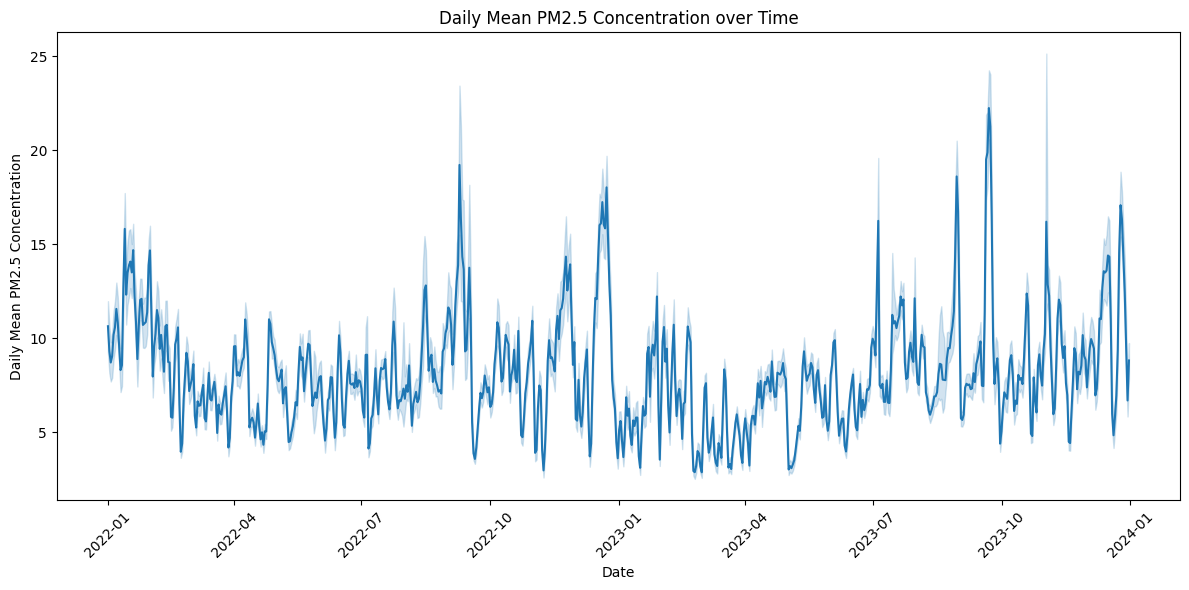

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'Date' sea de tipo datetime
df_combinado["Date"] = pd.to_datetime(df_combinado["Date"], errors="coerce")

# Elimina las filas con fechas no válidas si las hay
df_combinado.dropna(subset=["Date"], inplace=True)

# Ordena por fecha para asegurar una correcta visualización de la serie de tiempo
df_combinado.sort_values(by="Date", inplace=True)

# Graficar la serie de tiempo de la concentración de PM2.5
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combinado, x="Date", y="Daily Mean PM2.5 Concentration")
plt.title("Daily Mean PM2.5 Concentration over Time")
plt.xlabel("Date")
plt.ylabel("Daily Mean PM2.5 Concentration")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

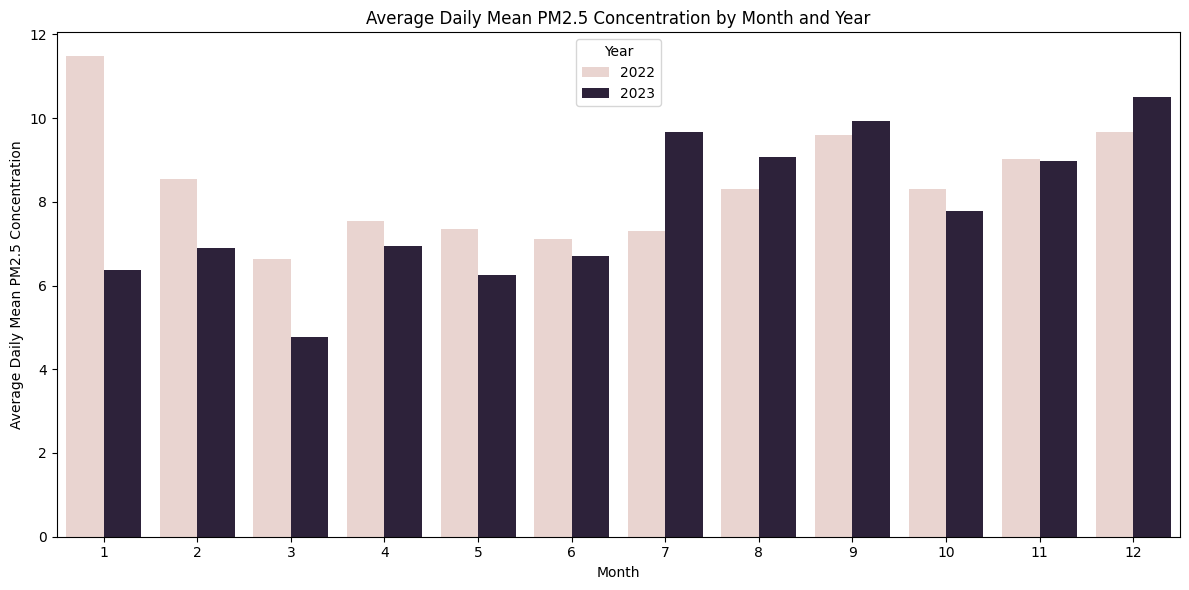

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de usar el DataFrame que contiene los promedios mensuales por año
# Este es df_grouped de celdas anteriores

plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="mes", y=col_concentracion, hue="año")
plt.title("Average Daily Mean PM2.5 Concentration by Month and Year")
plt.xlabel("Month")
plt.ylabel("Average Daily Mean PM2.5 Concentration")
plt.xticks(rotation=0)
plt.legend(title="Year")
plt.tight_layout()
plt.show()

Resumen Estadistico

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Asegurarse de que la columna 'Date' sea de tipo datetime
df_combinado["Date"] = pd.to_datetime(df_combinado["Date"], errors="coerce")

# Eliminar filas con fechas no válidas
df_combinado.dropna(subset=["Date"], inplace=True)

# Convertir la fecha a un formato numérico (días desde el inicio del dataset)
df_combinado["Time"] = (df_combinado["Date"] - df_combinado["Date"].min()).dt.days

# Definir la variable independiente (X) y dependiente (y)
X = df_combinado[["Time"]]
y = df_combinado["Daily Mean PM2.5 Concentration"]

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Obtener los coeficientes (pendiente e intersección)
slope = model.coef_[0]
intercept = model.intercept_

# Imprimir la ecuación de la recta
print(f"La ecuación de la recta de regresión es: y = {slope:.4f} * Tiempo + {intercept:.4f}")
print(f"Donde 'Tiempo' representa el número de días desde {df_combinado['Date'].min().strftime('%Y-%m-%d')}")

# Calcular el R cuadrado
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

# Imprimir el R cuadrado
print(f"El valor R cuadrado del modelo es: {r_squared:.4f}")

La ecuación de la recta de regresión es: y = 0.0005 * Tiempo + 7.9152
Donde 'Tiempo' representa el número de días desde 2022-01-01
El valor R cuadrado del modelo es: 0.0002


Nombres de las columnas